In [124]:
import numpy as np
import pickle
import  pandas as pd
import matplotlib.pyplot as plt
import hillfit   # https://github.com/himoto/hillfit

In [125]:
with open("saturdata2.pkl", "rb") as f:
    satur = pickle.load(f)

<function matplotlib.pyplot.show(close=None, block=None)>

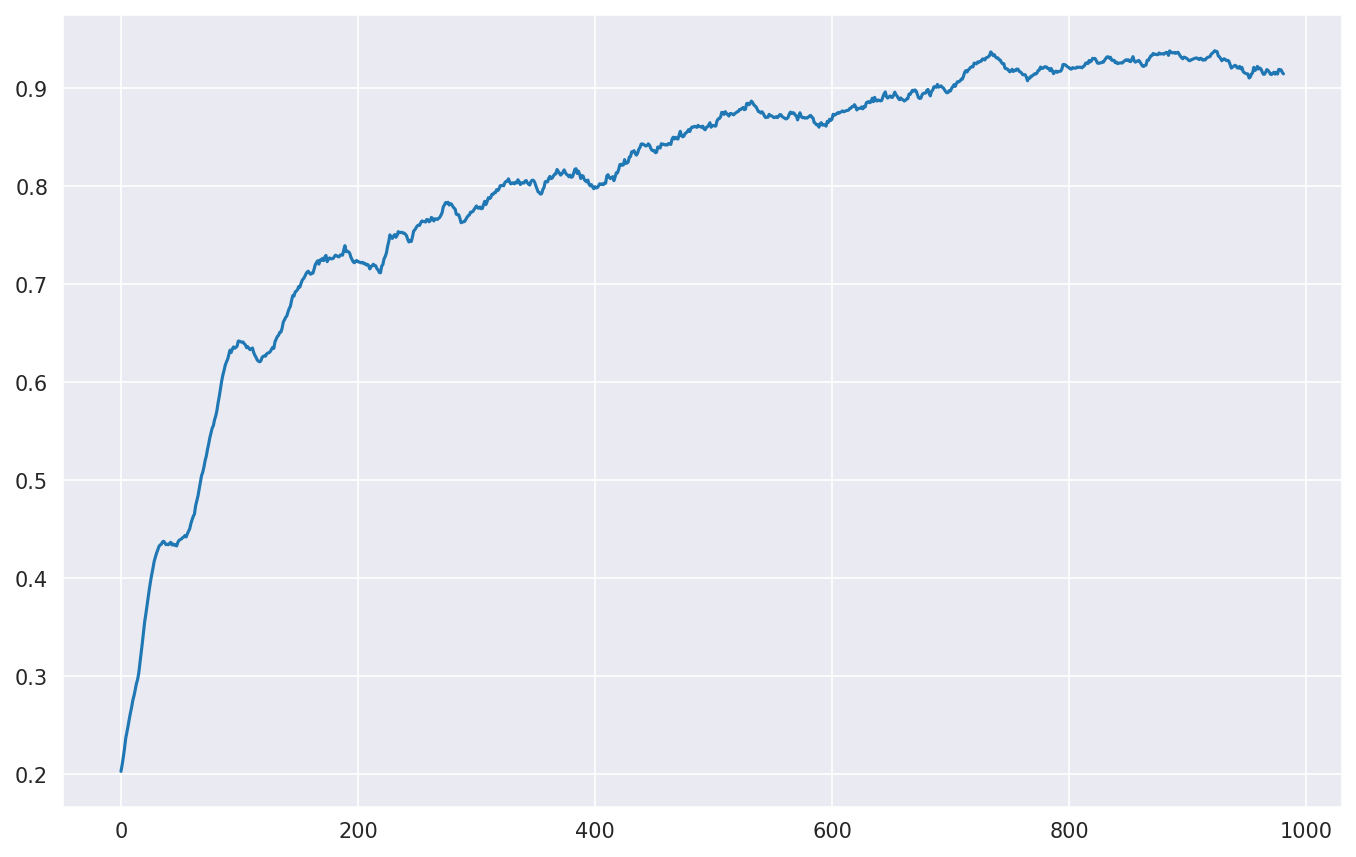

In [126]:
plt.plot(satur)
plt.show

In [127]:
# !pip install hillfit

In [128]:

hf = hillfit.HillFit(np.arange(satur.shape[0]), satur, bottom_param=True)

/ziob/klaudia/miniconda3/envs/hmm/lib/python3.10/site-packages/hillfit/fitting.py:123: RuntimeWarning: divide by zero encountered in log10
  np.log10(self.x_data[0]), np.log10(self.x_data[-1]), len(self.y_data)
/ziob/klaudia/miniconda3/envs/hmm/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/ziob/klaudia/miniconda3/envs/hmm/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


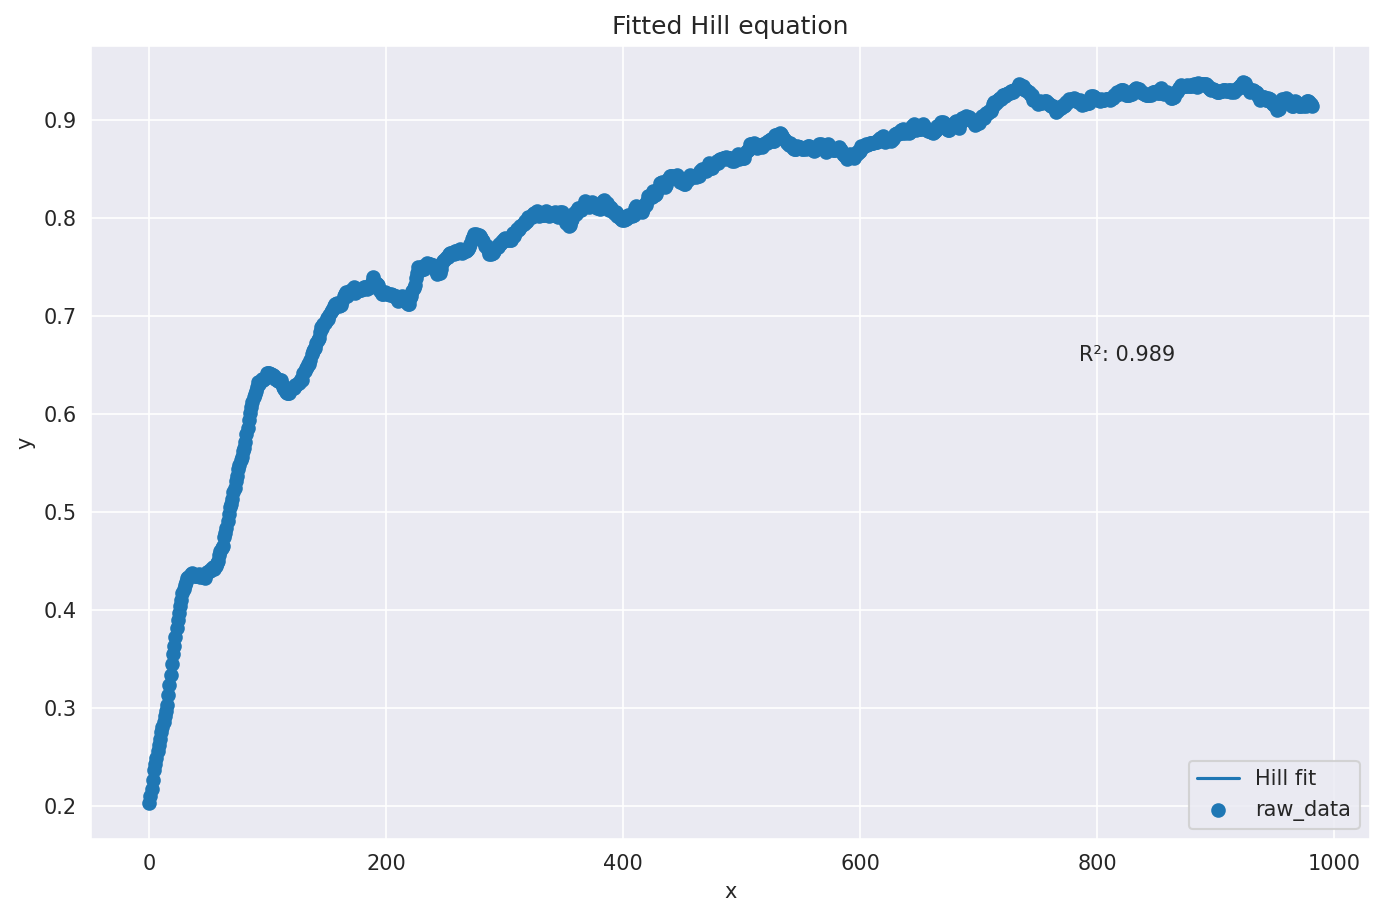

In [129]:
hf.fitting(x_label='x', y_label='y', title='Fitted Hill equation', sigfigs=3, log_x=False, print_r_sqr=True,
           generate_figure=True, view_figure=True, export_directory=None, export_name=None)

In [130]:
hf.export(export_name = 'hillfit-reg-linear')
print(hf.equation)

# evaluate the outputs
x = 200
print(f'eval() prediction at {x} hours:', eval(hf.equation))
print('R\N{superscript two}:',hf.r_2)
print('\ntop:', hf.top)
print('bottom:', hf.bottom)
print('ec50:', hf.ec50)
print('nH:', hf.nH)

0.168 + (1.07-0.168)*x**0.792 / (112.0**0.792 + x**0.792)
eval() prediction at 200 hours: 0.7207710652426114
R²: 0.9891592773533713

top: 1.0726004682288814
bottom: 0.16755266732101237
ec50: 111.979561074345
nH: 0.791501473112793


In [132]:
def hill_eq(x):
    # return 0.185 + (0.867-0.185)*x**1.18 / (68.0**1.18 + x**1.18)
    return 0.168 + (1.07-0.168)*x**0.792 / (112.0**0.792 + x**0.792)

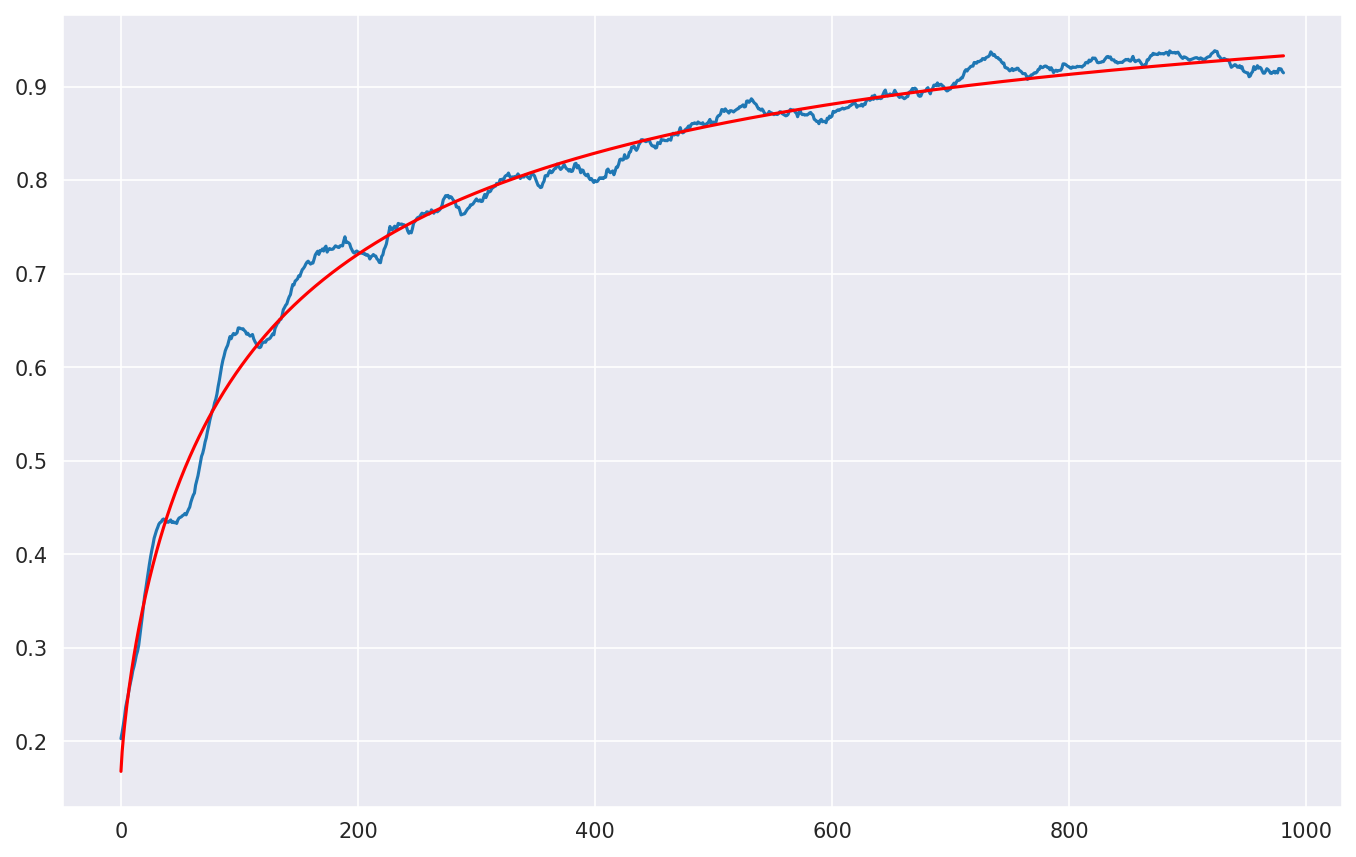

In [133]:
plt.plot(satur)
plt.plot(np.array([hill_eq(np.arange(satur.shape[0]))])[0, :], color="red")
plt.show()

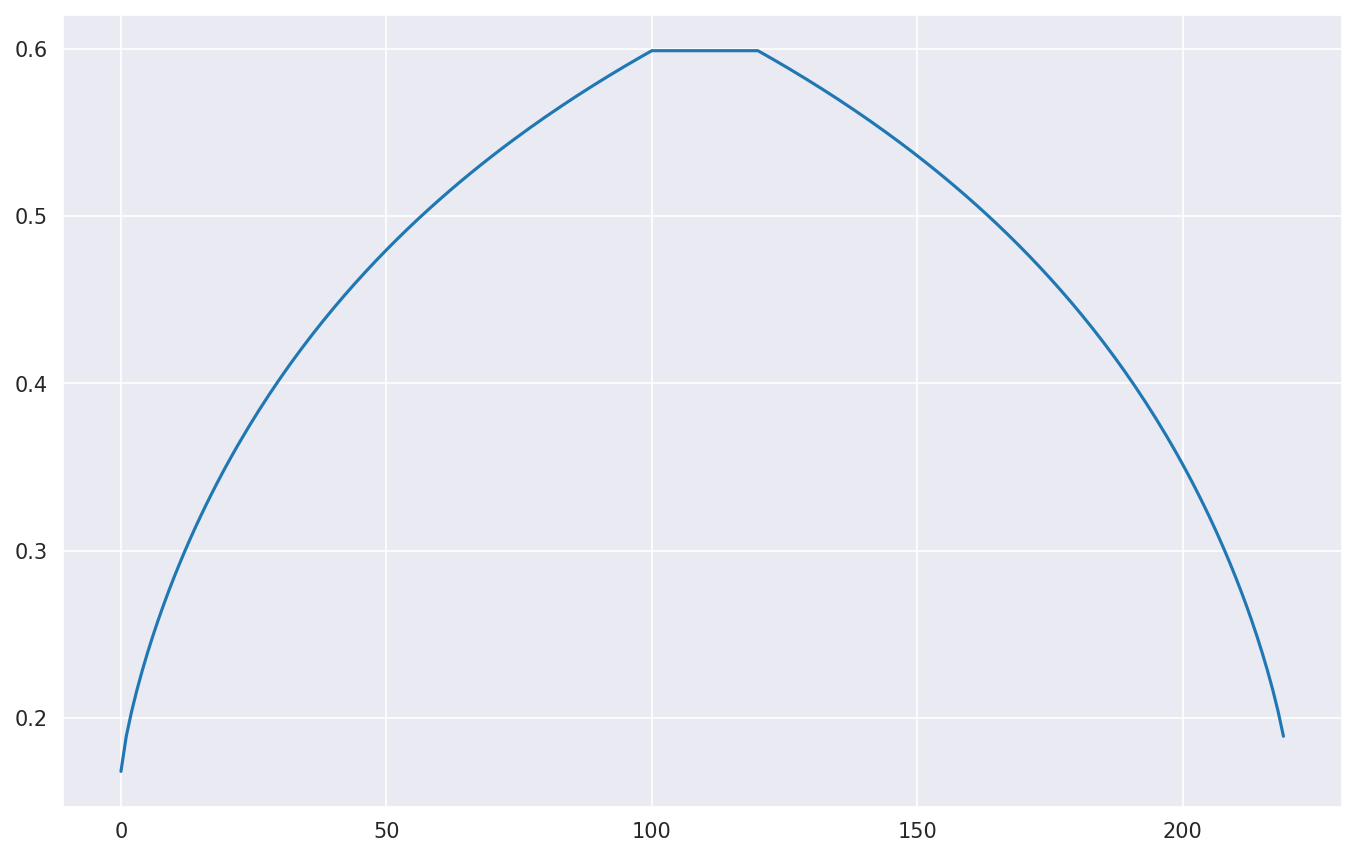

In [134]:
plt.plot(hill_eq(np.concatenate([np.arange(100), np.ones(20) * 100, np.arange(100,  0, -1)])))
plt.show()

In [135]:
# losuj z poissona długości okresów zainteresowania ze średnią 90
# koduj 0, 1 z powtórzeniami z Poissona
# rolling 365 z nałożeniem sumy

In [136]:
pois =  np.random.poisson(110, 25)
binar =  np.concatenate([np.ones(pois[i]) * (i % 2) for i in range(25)])
vals_full = binar.cumsum()
vals_full[150:] = vals_full[150:] - vals_full[:(-150)]

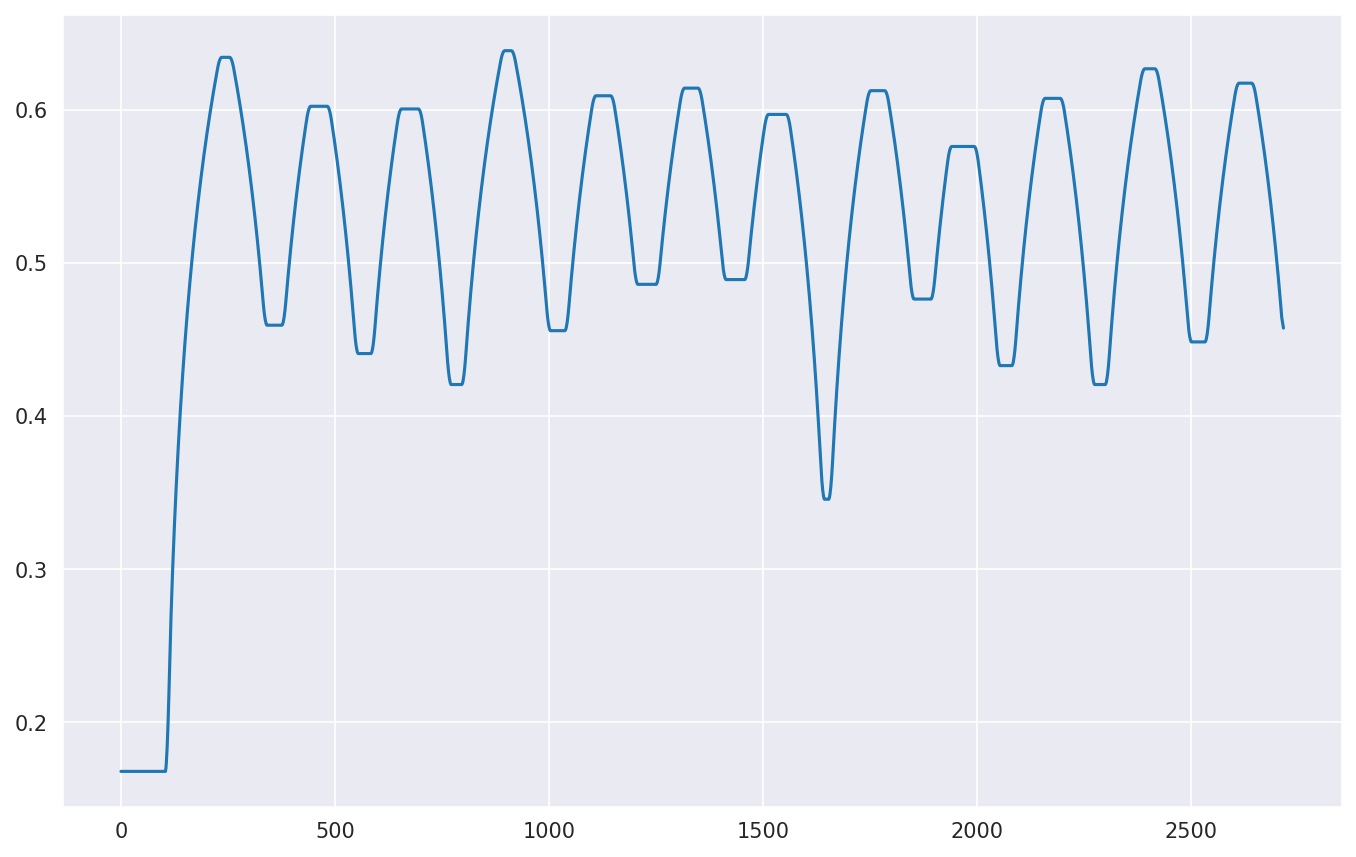

In [137]:
plt.plot(pd.Series(hill_eq(vals_full)).rolling(10, center=True, min_periods=1).mean())
plt.show()

In [138]:
def visualize_params(lam, nop, t, r):
    pois = np.random.poisson(lam, nop)
    binar = np.concatenate([np.ones(pois[i]) * (i % 2) for i in range(nop)])
    vals_full = binar.cumsum()
    vals_full[t:] = vals_full[t:] - vals_full[:(-t)]

    plt.plot(pd.Series(hill_eq(vals_full)).rolling(r, center=True, min_periods=1).mean())
    plt.title(f"lam={lam}, nop={nop}, t={t}, r={r}")
    plt.show()

    return hill_eq(vals_full)

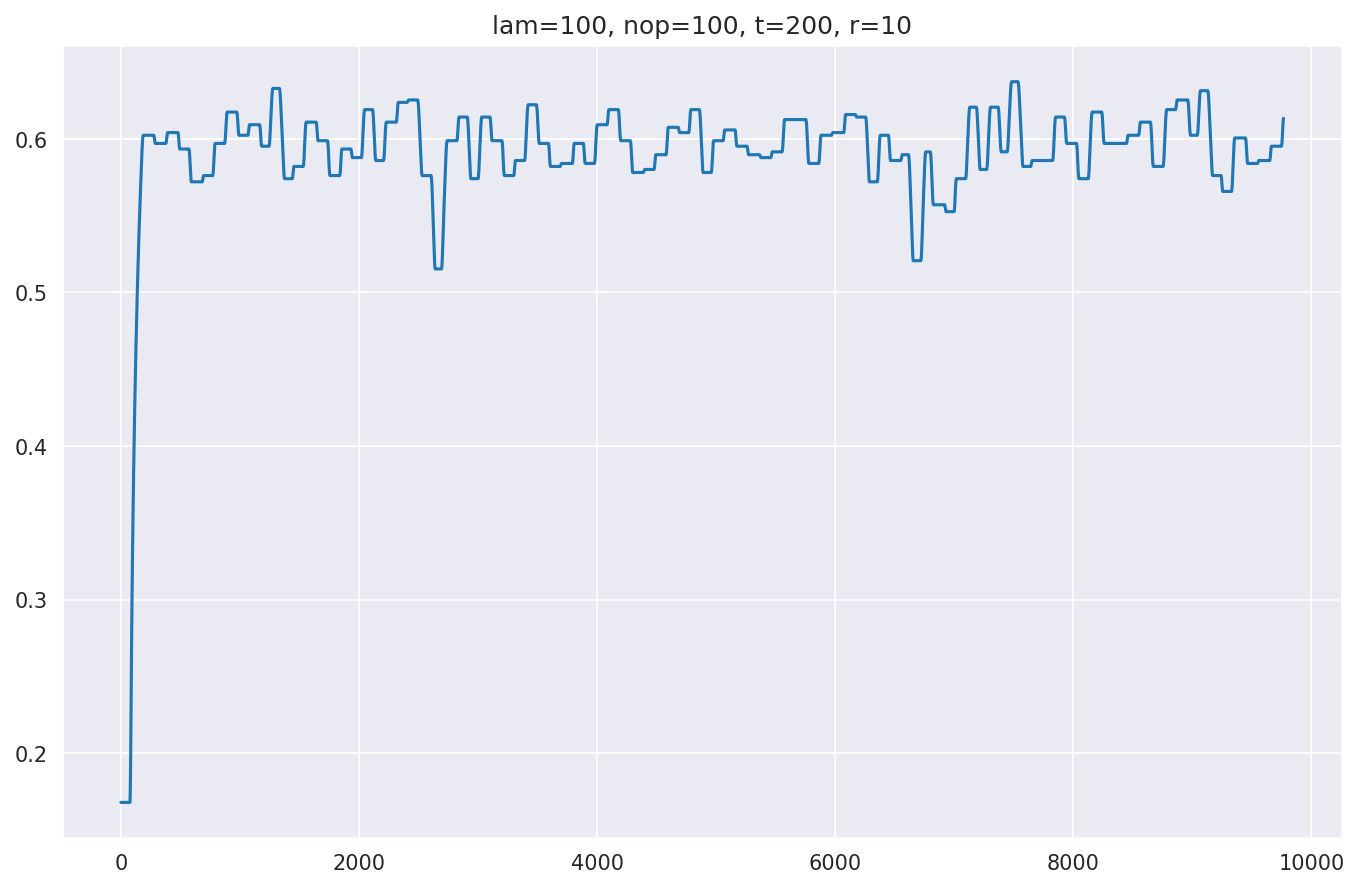

array([0.168     , 0.168     , 0.168     , ..., 0.61415113, 0.61578202,
       0.61739824])

In [139]:

visualize_params(100, 100, 200, 10)

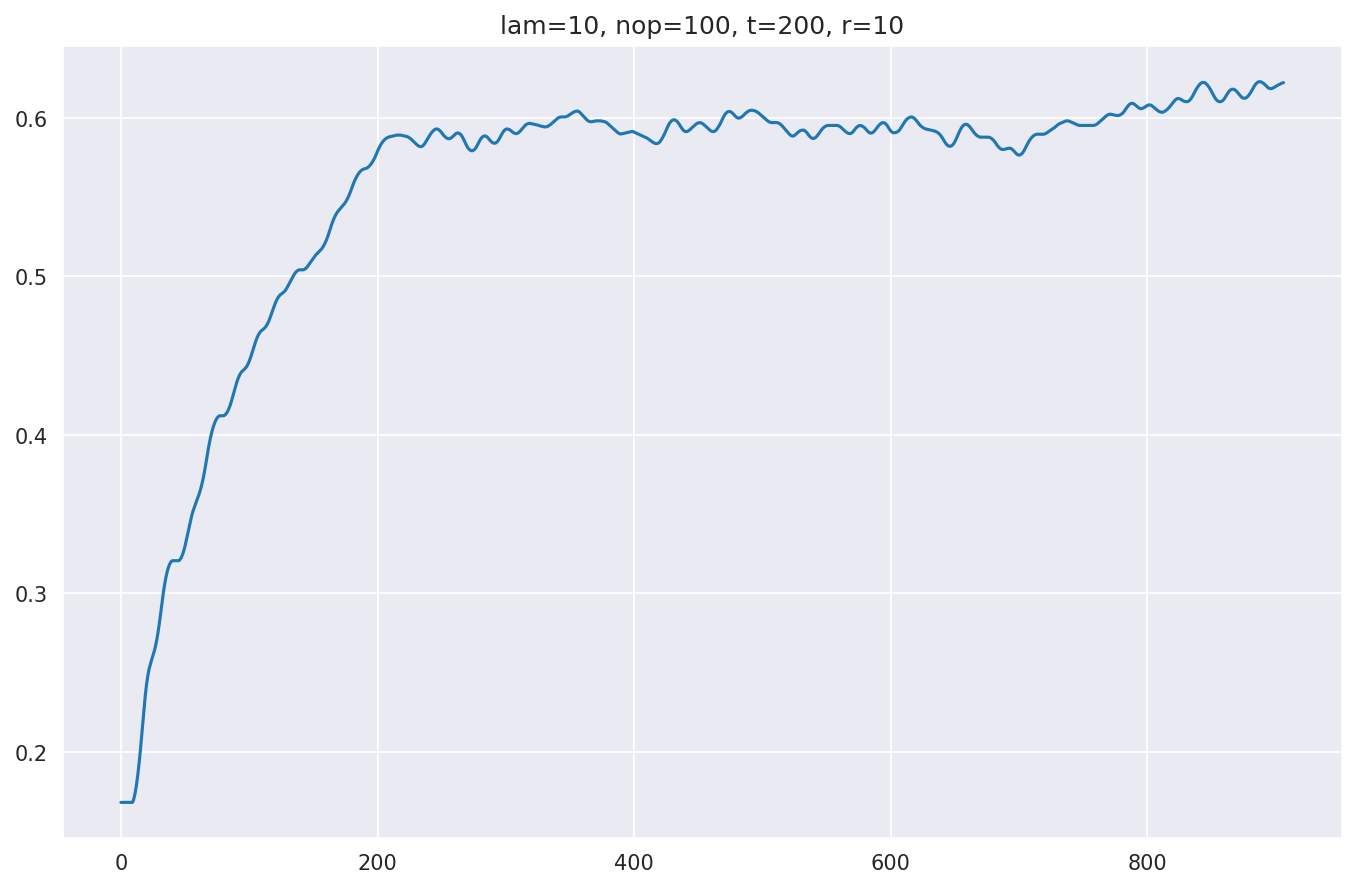

array([0.168     , 0.168     , 0.168     , 0.168     , 0.168     ,
       0.168     , 0.168     , 0.168     , 0.168     , 0.168     ,
       0.168     , 0.168     , 0.168     , 0.168     , 0.18898942,
       0.20373437, 0.21653818, 0.2281306 , 0.23884145, 0.24885976,
       0.25830838, 0.25830838, 0.25830838, 0.25830838, 0.25830838,
       0.25830838, 0.25830838, 0.25830838, 0.26727368, 0.27581978,
       0.28399625, 0.29184253, 0.29939083, 0.30666791, 0.31369642,
       0.32049574, 0.32049574, 0.32049574, 0.32049574, 0.32049574,
       0.32049574, 0.32049574, 0.32049574, 0.32049574, 0.32049574,
       0.32049574, 0.32049574, 0.32049574, 0.32049574, 0.32049574,
       0.32708266, 0.33347188, 0.33967636, 0.34570763, 0.351576  ,
       0.35729075, 0.35729075, 0.35729075, 0.35729075, 0.35729075,
       0.35729075, 0.35729075, 0.36286028, 0.36829221, 0.37359352,
       0.37877059, 0.38382929, 0.38877504, 0.39361285, 0.39834737,
       0.40298293, 0.40752355, 0.41197302, 0.41197302, 0.41197

In [140]:
visualize_params(10, 100, 200, 10)

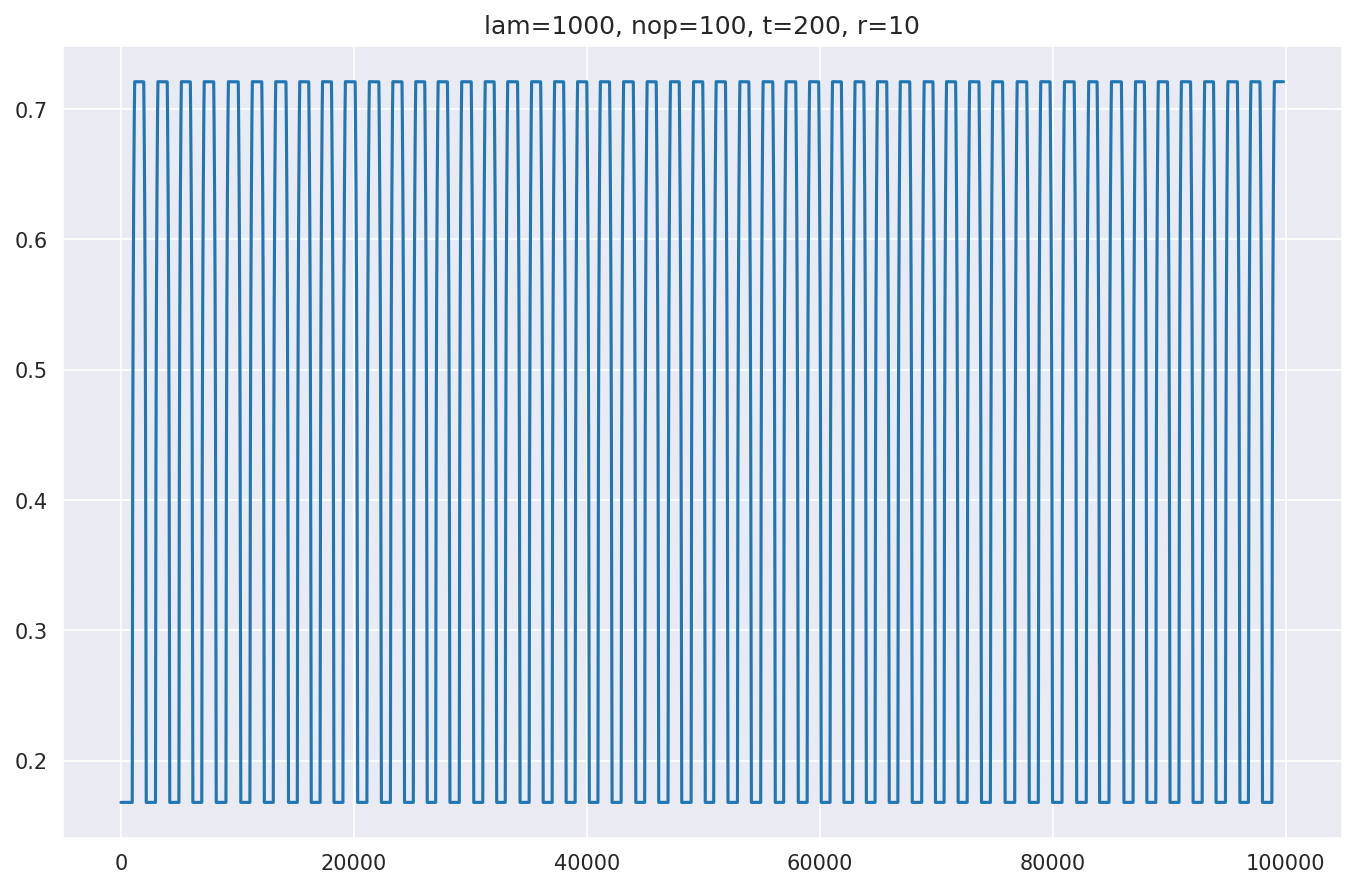

array([0.168     , 0.168     , 0.168     , ..., 0.72077107, 0.72077107,
       0.72077107])

In [141]:
visualize_params(1000, 100, 200, 10)

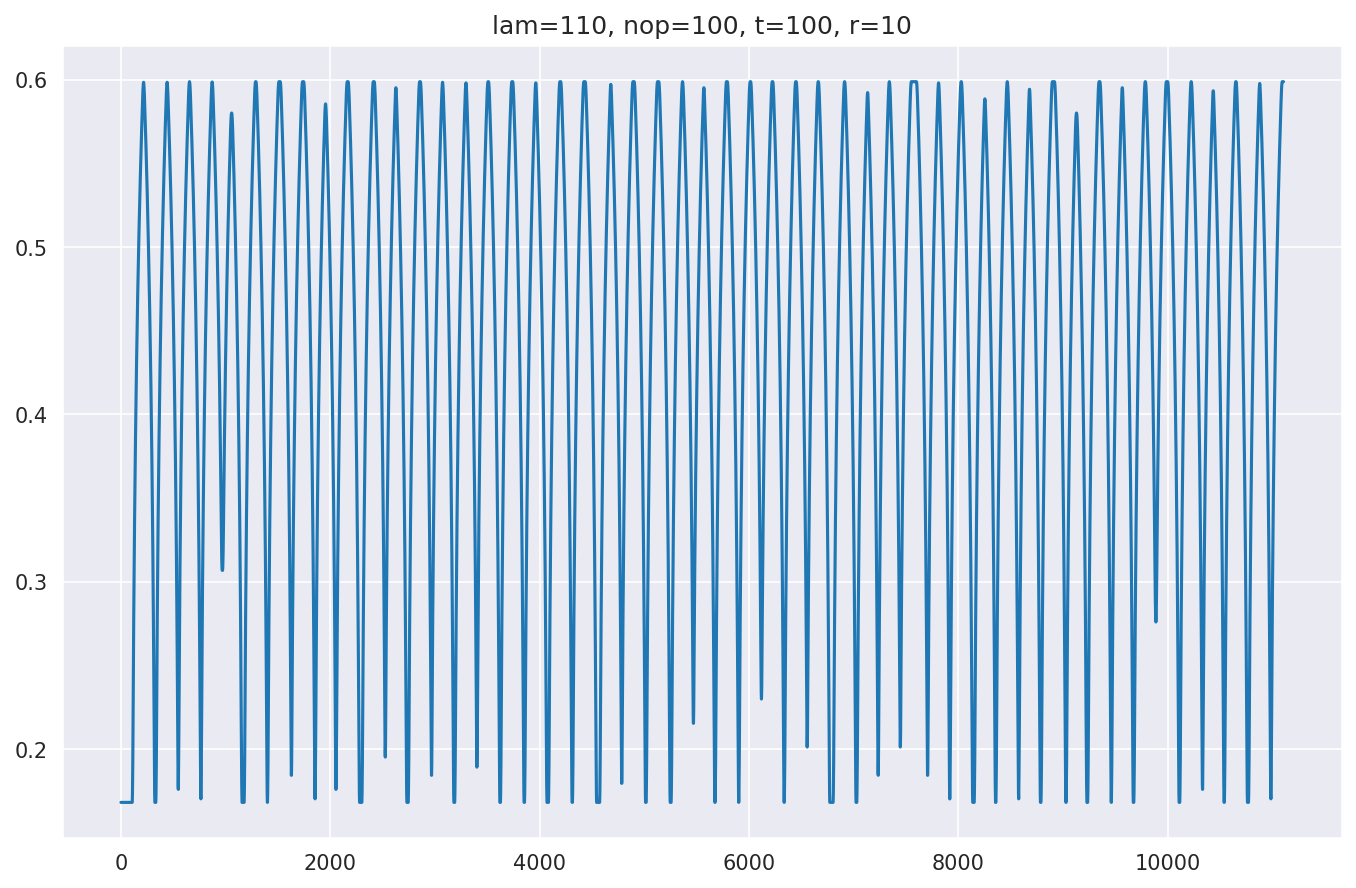

array([0.168     , 0.168     , 0.168     , ..., 0.59877353, 0.59877353,
       0.59877353])

In [142]:
visualize_params(110, 100, 100, 10)

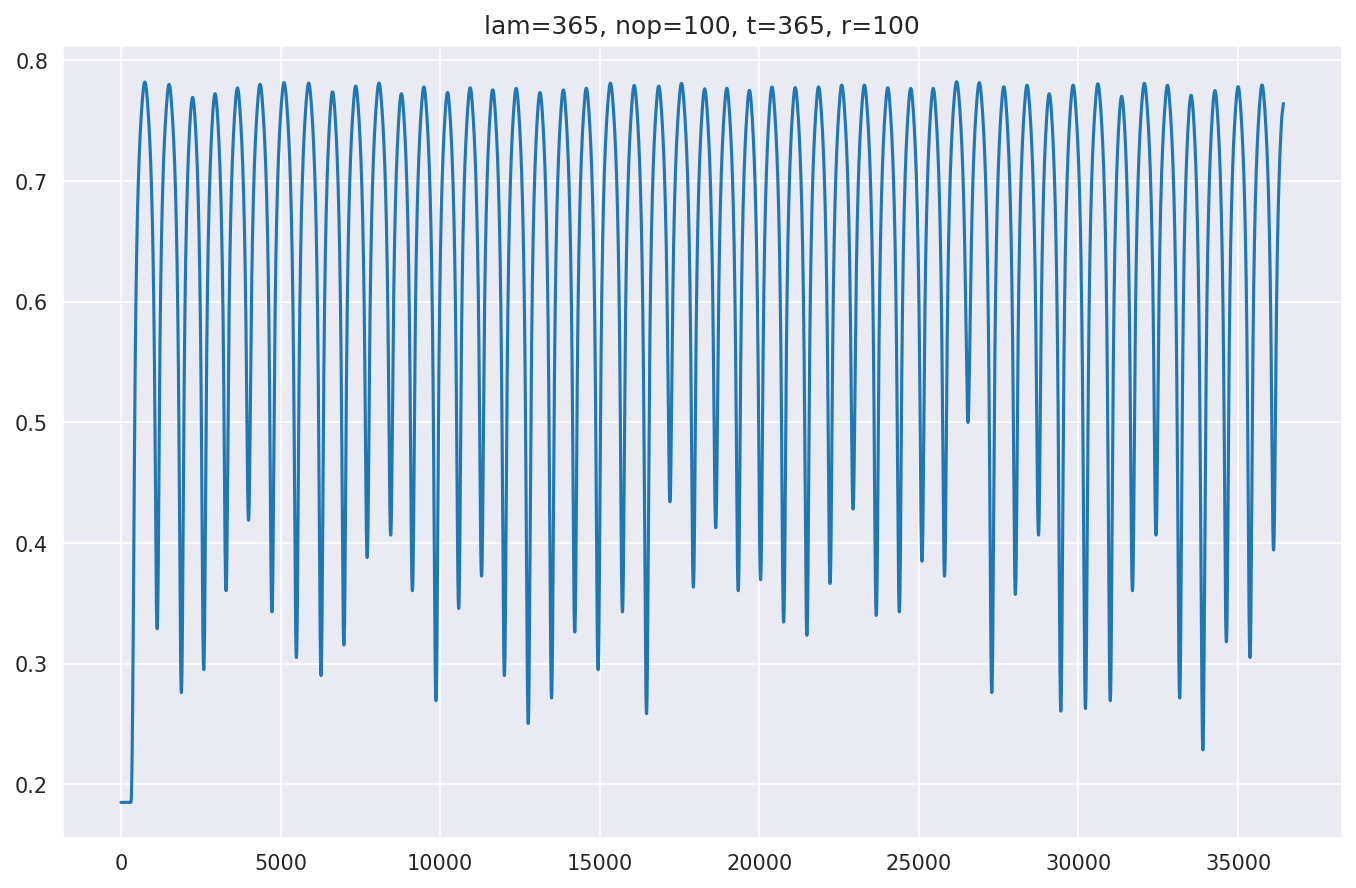

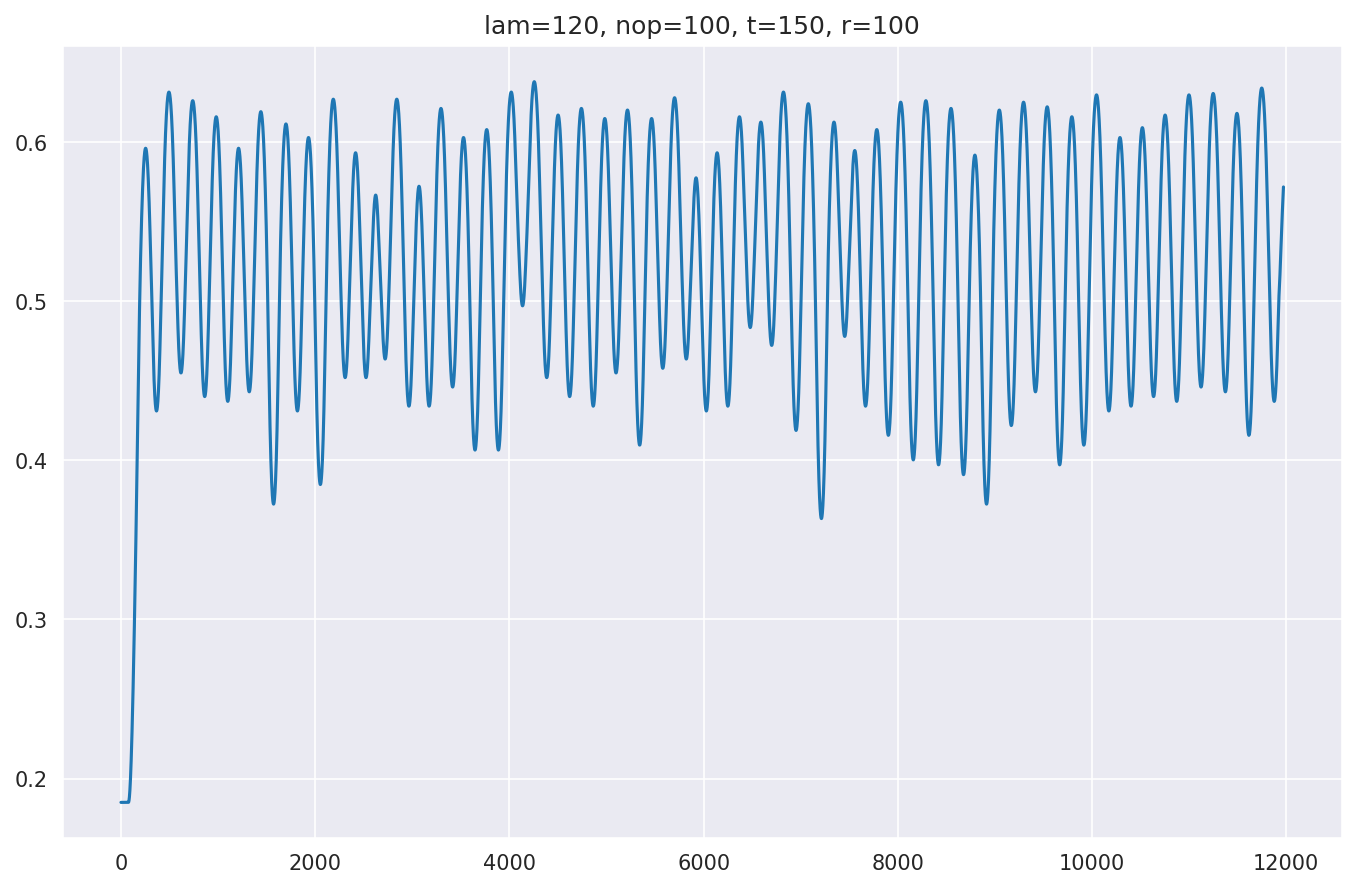

In [48]:
data = visualize_params(365, 100, 365, 100)
data = visualize_params(120, 100, 150, 100)

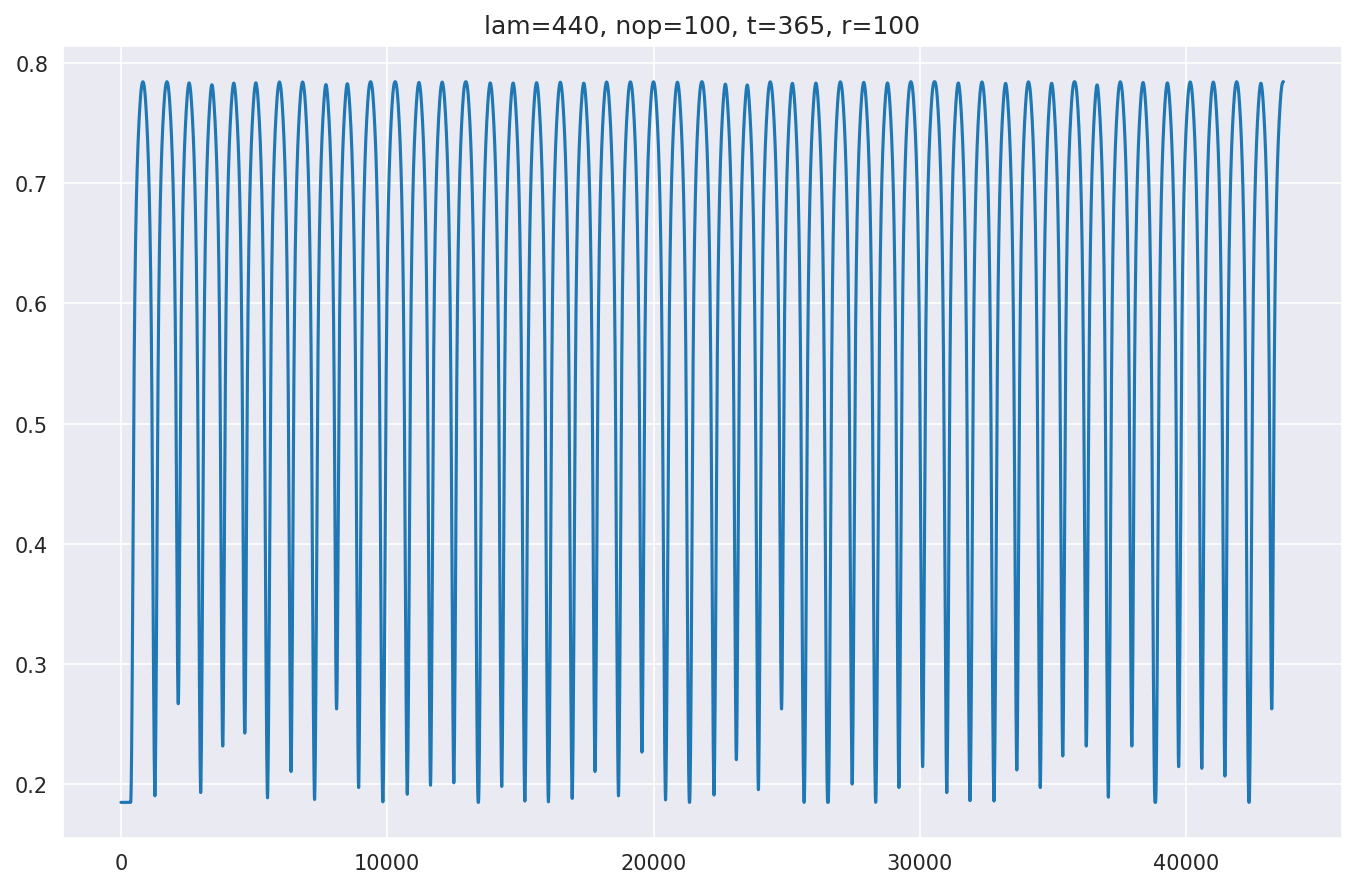

In [35]:
data = visualize_params(440, 100, 365, 100)

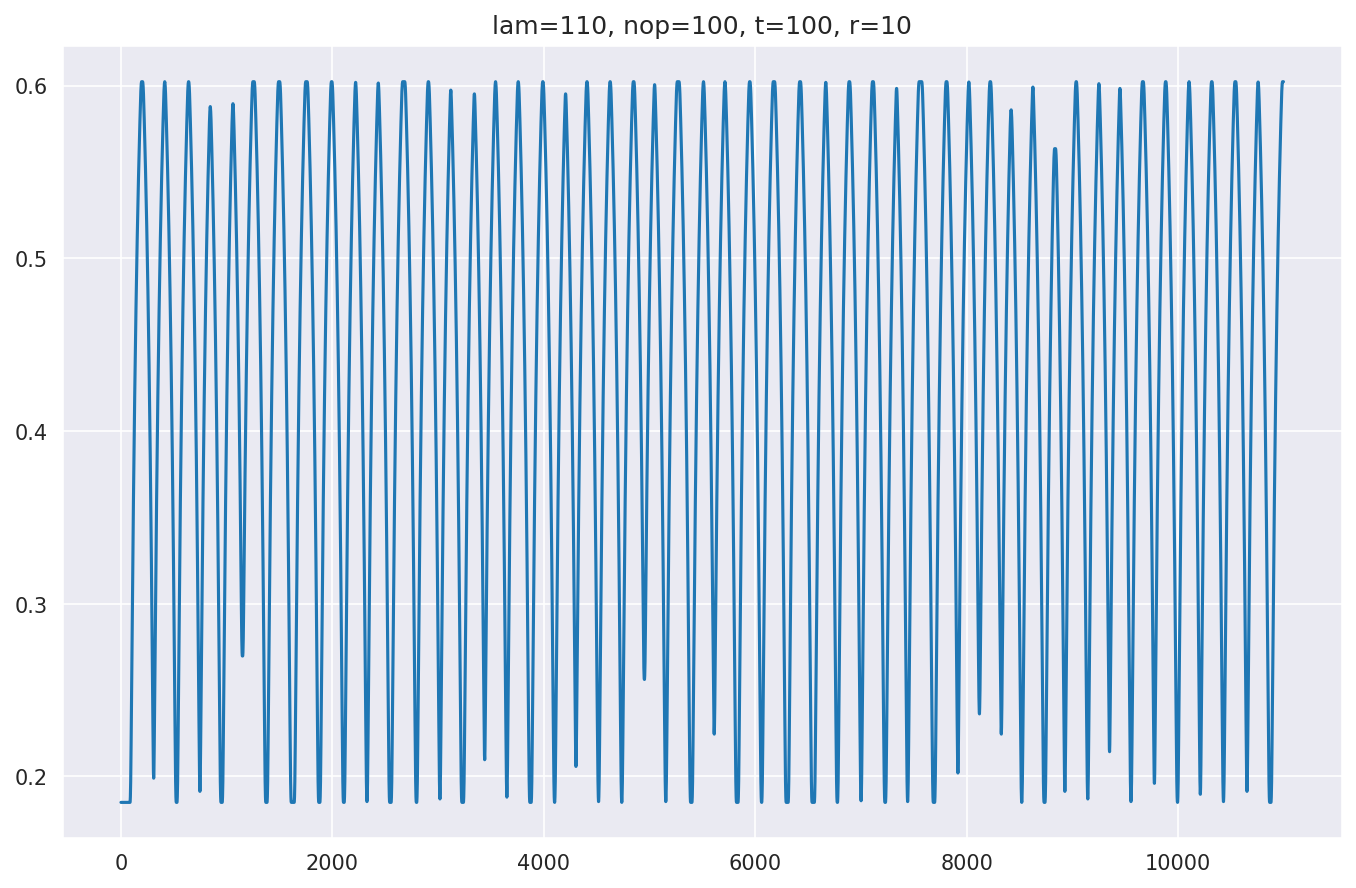

array([0.185    , 0.185    , 0.185    , ..., 0.6022795, 0.6022795,
       0.6022795])

In [36]:
visualize_params(110, 100, 100, 10)

In [145]:
from hmmlearn import hmm

In [146]:
data = data[200:]

In [147]:
model = hmm.GaussianHMM(3).fit(data.reshape(-1, 1))

In [148]:
states = model.predict(data.reshape(-1, 1))

In [155]:
model.score(data.reshape(-1, 1))

23309.391179608996

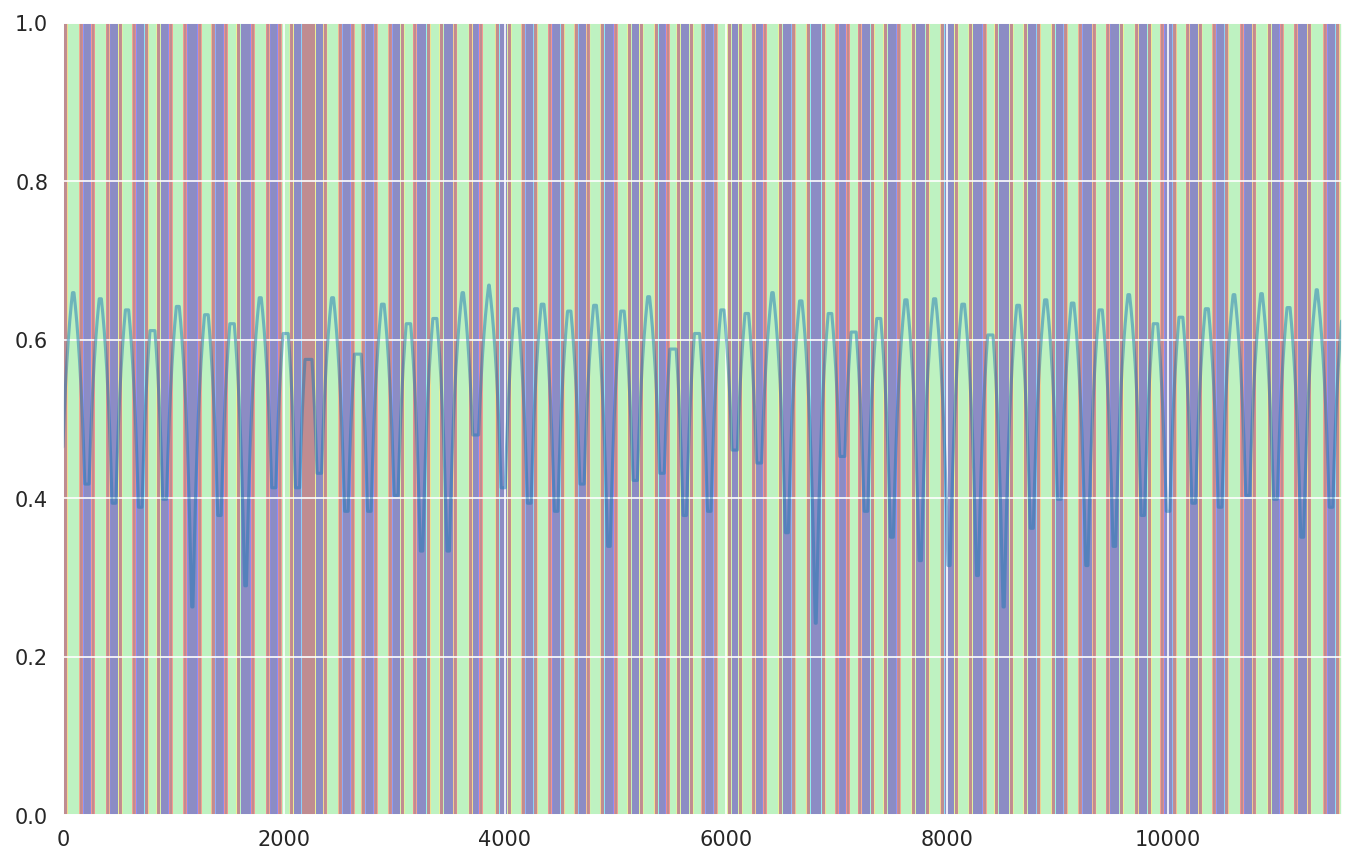

In [149]:
plt.imshow(states.reshape(1, -1), aspect="auto", extent = (-.5, data.shape[0]-.5, 0, 1), cmap="jet", alpha=0.4)
plt.plot(data.reshape(-1, 1), alpha=.5)
plt.show()

In [150]:
data

array([0.46480701, 0.46867072, 0.47247419, ..., 0.62025045, 0.6219296 ,
       0.62358872])

In [151]:
from model_gausian_2d_tf2 import GaussianDenseHMM


In [158]:
dense_model.score(data.reshape(-1, 1) * 100)

-40673.528131534506

In [ ]:
dense_model = GaussianDenseHMM(n_hidden_states=3, em_iter=100, early_stopping=True, mstep_config={'em_epochs': 100, 'em_lr': 0.01})
dense_model.fit(data.reshape(-1, 1) * 100)
dense_states = dense_model.predict(data.reshape(-1, 1) * 100)
plt.imshow(dense_states.reshape(1, -1) * 100, aspect="auto", extent=(-.5, data.shape[0] - .5, 0, 1), cmap="jet", alpha=0.4)
plt.plot(data.reshape(-1, 1), alpha=.5)
plt.show()

Fit model:  51%|██████████████████████████████████████████████████████████████████████████████████▌                                                                               | 51/100 [39:38<39:12, 48.00s/it]

         1      -93707.1707             +nan


inf


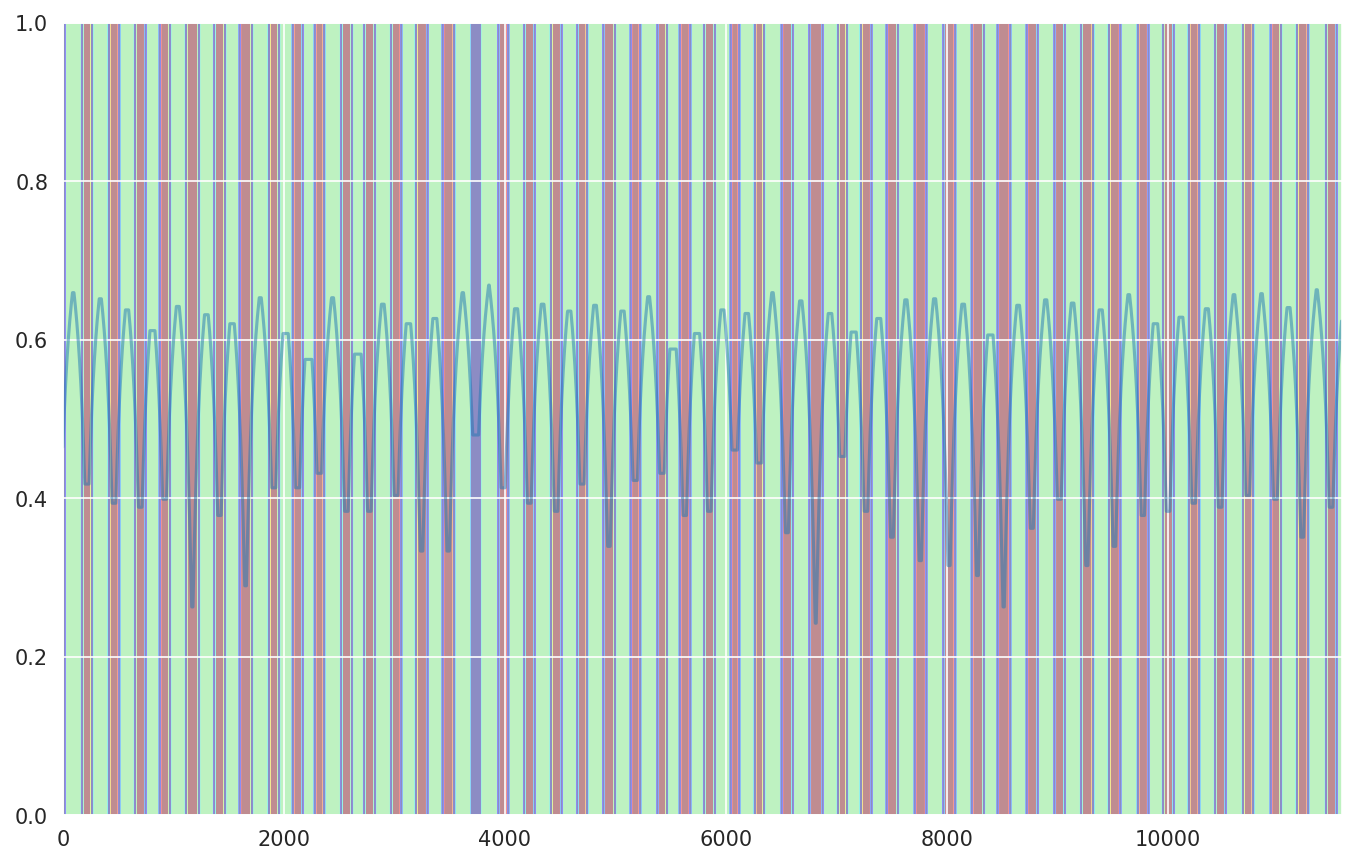

In [153]:
dense_model = GaussianDenseHMM(n_hidden_states=3, mstep_config={'cooc_epochs': 1000, 'cooc_lr': 0.001}, n_dims = 1, verbose=True)
dense_model.fit_coocs(data.reshape(-1, 1)*100, lengths=np.array([data.shape[0]]))
dense_states = dense_model.predict(data.reshape(-1, 1)*100)
plt.imshow(dense_states.reshape(1, -1), aspect="auto", extent=(-.5, data.shape[0] - .5, 0, 1), cmap="jet", alpha=0.4)
plt.plot(data.reshape(-1, 1), alpha=.5)
plt.show()

In [69]:
# dense_model

In [108]:
dense_model.covars_

array([[[0.9014138 ]],

       [[0.65292215]],

       [[0.4924835 ]]], dtype=float32)

In [109]:
dense_model.means_

array([[37.65692 ],
       [60.940964],
       [49.89222 ]], dtype=float32)

In [110]:
dense_model.transmat_

array([[9.8322290e-01, 3.2890266e-09, 1.6777104e-02],
       [2.8374325e-04, 9.9210691e-01, 7.6094135e-03],
       [1.2269158e-02, 1.2215900e-02, 9.7551495e-01]], dtype=float32)

In [123]:
data.shape

(11772,)